# Calibration CDM irradiated image pipeline with ``Pyxel``

<img style="float: right;" src="../../images/pyxel_logo.png" width="250">

This notebook is an example of a 'calibration' pipeline.

The purpose of the Calibration mode is to find the optimal input arguments of models or optimal detector attributes based on a target dataset the models or detector behaviour shall reproduce. It is based on using the library PyGMO (https://esa.github.io/pygmo/).

If you haven't installed Pyxel yet, visit https://esa.gitlab.io/pyxel/doc/tutorials/install.html for instructions.

The YAML configuration file looks like that:

```yaml
# YAML configuration file for Calibration mode

calibration:
  
    mode:                 pipeline
    result_type:          image
    result_fit_range:     [0, 100, 0, 50]
    target_data_path:     ['../examples/CTI/input_data/cti/data.fits'] #Specifiy target data
    target_fit_range:     [0, 100, 0, 50]
    seed:                 20001
    fitness_function:
      func:               pyxel.calibration.fitness.sum_of_abs_residuals
      arguments:
    algorithm:
      type:               sade
      generations:        15
      population_size:    10
      variant:            2
    parameters:
      - key:              pipeline.charge_transfer.cdm.arguments.beta_p
        values:           _
        logarithmic:      false
        boundaries:       [0., 1.]
        
  outputs:                        # Define parameters for output
    output_folder: 'output'
    calibration_plot:             # Create a PNG image
      champions_plot:
      population_plot:
    
  ccd_detector:                   # Define detector
    ...
    
  pipeline:                       # Define the pipeline
    ...
```

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
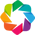

In [1]:
from pathlib import Path

import dask
import numpy as np
import pandas as pd
import pyxel
import seaborn as sns
import xarray as xr
from matplotlib import pyplot as plt

In [2]:
# Display current version of Pyxel
print("Pyxel version:", pyxel.__version__)

Pyxel version: 1.0.0-rc.1+2.g326f4588.dirty


## Set a scheduler for ``Dask``

In [3]:
# Create a 'local' Cluster
from distributed import Client

client = Client()

client

C:\Work\tools\Anaconda3\envs\pyxel-dev\lib\site-packages\distributed\node.py:151: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 59960 instead
  warnings.warn(


<Client: 'tcp://127.0.0.1:59963' processes=4 threads=12, memory=31.72 GiB>

## Open the example YAML file

In [4]:
# Configuration file
config = pyxel.load("calibration.yaml")

config

Configuration(pipeline=DetectionPipeline<is_running=False, doc=None>, exposure=None, observation=None, calibration=<pyxel.calibration.calibration.Calibration object at 0x0000023AF3FD4CA0>, ccd_detector=<pyxel.detectors.ccd.CCD object at 0x0000023AF3FD4E50>, cmos_detector=None, mkid_detector=None)

## Display the configuration

### Simulation
Simulation stores the mode, the `Outputs` class and information about the advanced usage modes: parametric, calibration and dynamic. We can display the configuration dictionary separately using `jupyxel.py` from utilities.

### Pipeline

### Display a model

## Creating calibration, detector and detection pipeline objects


In [5]:
detector = config.detector
pipeline = config.pipeline
calibration = config.calibration

In [6]:
(
    calibration.num_islands,
    calibration.num_evolutions,
    calibration.algorithm.generations,
    calibration.algorithm.population_size,
    calibration.topology,
)

(2, 2, 5, 20, 'unconnected')

## Run calibration

The following steps are done:
1. Create (user-defined) islands with new random population.
   Parallelization is achieved by the (user-defined) batch fitness evaluators.
1. Create a new archipelago and run all islands in parallel.
   Parallelization is achieved by the (user-defined) islands.

In [7]:
%%time

ds, processors, logs, filenames = pyxel.calibration_mode(
    calibration=calibration, detector=detector, pipeline=pipeline
)

ds

Create islands:   0%|          | 0/2 [00:00<?, ?it/s]

Evolve with 2 islands:   0%|          | 0/10 [00:00<?, ? generations/s]

C:\Work\tools\Anaconda3\envs\pyxel-dev\lib\site-packages\distributed\worker.py:3560: UserWarning: Large object of size 1.24 MiB detected in task graph: 
  (Problem name: <class 'pyxel.calibration.fitting.M ... 5.12455e+06]
,)
Consider scattering large objects ahead of time
with client.scatter to reduce scheduler burden and 
keep data on workers

    future = client.submit(func, big_data)    # bad

    big_future = client.scatter(big_data)     # good
    future = client.submit(func, big_future)  # good
  warnings.warn(


Wall time: 35.2 s


<xarray.Dataset>
Dimensions:              (island: 2, evolution: 2, param_id: 4, id_processor: 1, readout_time: 1, y: 100, x: 100)
Coordinates:
  * island               (island) int64 0 1
  * evolution            (evolution) int64 0 1
  * id_processor         (id_processor) int32 0
  * readout_time         (readout_time) int32 1
  * y                    (y) int32 0 1 2 3 4 5 6 7 8 ... 92 93 94 95 96 97 98 99
  * x                    (x) int32 0 1 2 3 4 5 6 7 8 ... 92 93 94 95 96 97 98 99
  * param_id             (param_id) int32 0 1 2 3
Data variables:
    champion_fitness     (evolution, island) float64 4.672e+06 ... 4.219e+06
    champion_decision    (evolution, island, param_id) float64 0.002426 ... 9...
    champion_parameters  (evolution, island, param_id) float64 0.002426 ... 9...
    simulated_image      (island, id_processor, readout_time, y, x) uint16 48...
    simulated_signal     (island, id_processor, readout_time, y, x) float64 4...
    simulated_pixel      (island, id_processor, readout_time, y, x) float64 6...
    target               (id_processor, y, x) >f8 4.834e+03 ... 4.865e+03
Attributes:
    num_islands:      2
    population_size:  20
    num_evolutions:   2
    generations:      5
    topology:         unconnected
    result_type:      ResultType.Image

## Display logs

In [8]:
logs

num_generations  num_evaluations  best_fitness         f        cr  \
0                 1               20  4.676232e+06  0.181983  0.220534   
1                 2               40  4.676232e+06  0.181983  0.220534   
2                 3               60  4.671609e+06  0.181983  0.350833   
3                 4               80  4.671609e+06  0.181983  0.350833   
4                 5              100  4.671609e+06  0.181983  0.350833   
5                 1               20  4.931203e+06  0.827495  0.823362   
6                 2               40  4.931203e+06  0.827495  0.823362   
7                 3               60  4.931203e+06  0.827495  0.823362   
8                 4               80  4.223362e+06  0.339003  0.421819   
9                 5              100  4.223362e+06  0.339003  0.421819   
10                1               20  4.319785e+06  0.993188  0.183054   
11                2               40  4.201156e+06  0.993188  0.183054   
12                3               60  4.201156e+06  0.993188  0.183054   
13                4               80  4.201156e+06  0.993188  0.183054   
14                5              100  4.175173e+06  0.993188  0.183054   
15                1               20  4.223362e+06  0.811761  0.893074   
16                2               40  4.223362e+06  0.811761  0.893074   
17                3               60  4.223362e+06  0.811761  0.893074   
18                4               80  4.218504e+06  0.993188  0.183054   
19                5              100  4.218504e+06  0.993188  0.183054   

          dx            df  id_island  id_evolution  global_num_generations  
0   3.327190  3.291592e+06          1             1                       1  
1   4.117822  3.223028e+06          1             1                       2  
2   4.712526  3.181121e+06          1             1                       3  
3   4.974306  3.176772e+06          1             1                       4  
4   4.307252  2.974995e+06          1             1                       5  
5   4.900542  2.920668e+06          2             1                       1  
6   4.418836  2.883778e+06          2             1                       2  
7   4.418836  2.883778e+06          2             1                       3  
8   3.262900  3.393346e+06          2             1                       4  
9   3.145964  3.315009e+06          2             1                       5  
10  2.297782  2.663598e+06          1             2                       6  
11  2.389447  2.766551e+06          1             2                       7  
12  2.389447  2.766551e+06          1             2                       8  
13  2.389447  2.766551e+06          1             2                       9  
14  2.678711  2.792533e+06          1             2                      10  
15  2.267885  3.207513e+06          2             2                       6  
16  2.695420  3.032911e+06          2             2                       7  
17  2.970909  2.810449e+06          2             2                       8  
18  2.191718  2.362941e+06          2             2                       9  
19  1.924370  2.319730e+06          2             2                      10

In [9]:
np.min(logs["best_fitness"])

4175173.112960007

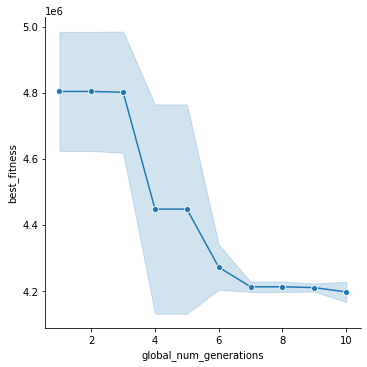

In [10]:
sns.relplot(
    x="global_num_generations",
    y="best_fitness",
    kind="line",
    ci="sd",
    data=logs,
    marker="o",
)

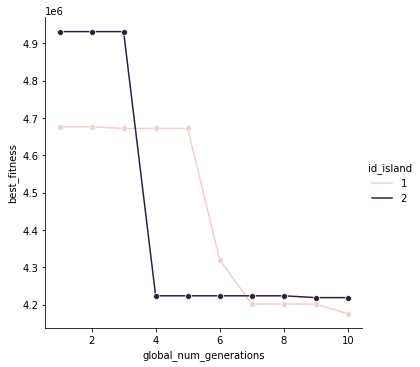

In [11]:
sns.relplot(
    x="global_num_generations",
    y="best_fitness",
    hue="id_island",
    kind="line",
    data=logs,
    marker="o",
)

## Save processors and extract simulated data from them

In [12]:
%%time

all_filenames, new_ds = dask.compute(filenames, ds)

Wall time: 998 µs


### Get all processors 'filenames'

In [13]:
import itertools


def flatten(list_of_lists):
    "Flatten one level of nesting"
    return itertools.chain.from_iterable(list_of_lists)


def get_relative_filename(filename):
    return str(Path(filename).relative_to(calibration.output_dir))


processors_filenames = pd.DataFrame(
    list(flatten(all_filenames)), columns=["filename"]
).applymap(get_relative_filename)
print(f"Processor filenames in folder: '{calibration.output_dir}'")


processors_filenames

Processor filenames in folder: 'C:\Work\dev\pyxel-data\examples\calibration\output\run_20220118_112355'


Empty DataFrame
Columns: [filename]
Index: []

In [14]:
new_ds

<xarray.Dataset>
Dimensions:              (island: 2, evolution: 2, param_id: 4, id_processor: 1, readout_time: 1, y: 100, x: 100)
Coordinates:
  * island               (island) int64 0 1
  * evolution            (evolution) int64 0 1
  * id_processor         (id_processor) int32 0
  * readout_time         (readout_time) int32 1
  * y                    (y) int32 0 1 2 3 4 5 6 7 8 ... 92 93 94 95 96 97 98 99
  * x                    (x) int32 0 1 2 3 4 5 6 7 8 ... 92 93 94 95 96 97 98 99
  * param_id             (param_id) int32 0 1 2 3
Data variables:
    champion_fitness     (evolution, island) float64 4.672e+06 ... 4.219e+06
    champion_decision    (evolution, island, param_id) float64 0.002426 ... 9...
    champion_parameters  (evolution, island, param_id) float64 0.002426 ... 9...
    simulated_image      (island, id_processor, readout_time, y, x) uint16 48...
    simulated_signal     (island, id_processor, readout_time, y, x) float64 4...
    simulated_pixel      (island, id_processor, readout_time, y, x) float64 6...
    target               (id_processor, y, x) >f8 4.834e+03 ... 4.865e+03
Attributes:
    num_islands:      2
    population_size:  20
    num_evolutions:   2
    generations:      5
    topology:         unconnected
    result_type:      ResultType.Image

## Get simulated data

In [15]:
result_type = calibration.fitting.sim_output

result_type

<ResultType.Image: 'image'>

In [16]:
# Extract simulated and target data

from pyxel.calibration import ResultType

var_name = {
    ResultType.Image: "simulated_image",
    ResultType.Signal: "simulated_signal",
    ResultType.Pixel: "simulated_pixel",
}[result_type]


simulated_data = new_ds[var_name]
target_data = new_ds["target"]

output_data = xr.Dataset()
output_data["simulated"] = simulated_data
output_data["target"] = target_data


output_data

<xarray.Dataset>
Dimensions:       (island: 2, id_processor: 1, readout_time: 1, y: 100, x: 100)
Coordinates:
  * island        (island) int64 0 1
  * id_processor  (id_processor) int32 0
  * readout_time  (readout_time) int32 1
  * y             (y) int32 0 1 2 3 4 5 6 7 8 9 ... 91 92 93 94 95 96 97 98 99
  * x             (x) int32 0 1 2 3 4 5 6 7 8 9 ... 91 92 93 94 95 96 97 98 99
Data variables:
    simulated     (island, id_processor, readout_time, y, x) uint16 4833 ... ...
    target        (id_processor, y, x) >f8 4.834e+03 4.645e+03 ... 4.865e+03

## Plotting 'target'

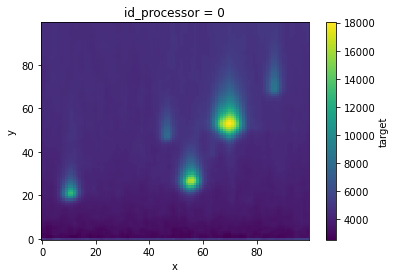

In [17]:
if result_type is ResultType.Image:

    if len(output_data["target"]["id_processor"]) == 1:
        # Only one processor
        output_data["target"].plot()
    else:
        # Several processors
        output_data["target"].plot(col="id_processor")

elif result_type is ResultType.Pixel:

    output_data["target"].plot.line(col="id_processor", x="y")

else:
    raise NotImplementedError

## Plotting 'simulated'

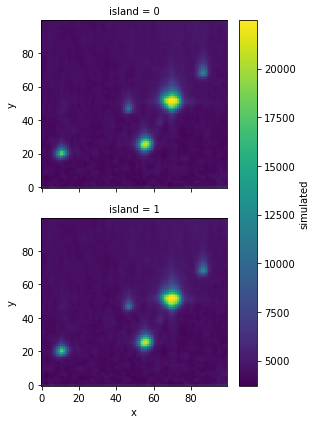

In [18]:
if result_type is ResultType.Image:

    output_data["simulated"].plot(row="island")

elif result_type is ResultType.Pixel:
    output_data["simulated"].plot(row="island", col="id_processor")

else:
    raise NotImplementedError